# <span style="color:red"> Numerical Simulation 9 </span>

## Exercise 9.1

#### <span style="color:black"> Objective </span>

The heart of this simulation is the travel salesman problem (TSP). The TSP consists in minimize the path's lenght through $N$ cities, with positions $\vec{c}_i$, visited only once except for the first city, in fact the salesman must starts and ends the journey at the same city. For doing that we had to write a genetic algorithm and at the end of the simulation we will show a picture of the path with the estimated lenght.

#### <span style="color:black"> Rappresentation choice </span>

The TSP was mapped into an $1D$ rappresentation which means that one integer number was assigned to every city and the path is expressed via $1D$ vector where elements are the cities and their positions are the visit order. The cost function to minimize is:

$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

#### <span style="color:black"> Code's description </span>

In our case $N$ was fixed equal to $32$ while the positions of the city were generated in two different way : randomly placed on a circonference, this was made sampling the angle from $0$ to $2 \pi$ and randomly placed inside a square, this was made generating random number between $-\frac{l}{2}$ and $\frac{l}{2}$ where l is the square side.


The code was build around two c++ classes individual and population. 
**Individual** rappresent a single path, it  contains the number of the city, lenght of the path and the path under the form of a vector. The methods of the individual class are the one which mutate a single individual, check if it fullfills the boundary condition and evaluate the length. The details of this method will be discussed later.
**Population** contains the number of the city, the number of individual who belong to a single population, the estimated best path length and best path and more useful information such the cities position or the probability to make a mutation or crossover. The population of path it is divide in two: old generation,each iteration the one that will be mutated, and a new generation. Furtermore this two generations are stored in a vector of the std template library with individual class as variable. The principle method of the class are mutation and crossover which will be discussed later. Furthermore this classe make averages and print the result of interest.

Some key feature of the genetic aglorithm (GA) are:

- selection operator for deciding individual to mutate
- check function that verify the respect of boundary condition
- mutation operators 
- crossover operator

Let's see how I've implemented this element of GA inside the class.

The selection operator uses the order in the orderd population and  select the individual $j$ with the algorithm: $j=int(N\times r^p)$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. After some try I find that $3$ was a good exponent. This operator belong to the population class.  

The boundary condition (BC) each individual must fullfill are: first city must be the same for the entire population, each path must start and end at same city and every city can be visited only once. The check function work as it follows: first control the correctness of the first city after that with a double for cycle check if a city appear twice or never because it means that one misses. If it find something wrong exits from program and prints the type of the error and the individual.  

Mutation operators have a centre role in this kind of algorithm, they make, with the croosover, possible to evolve the start population through the optimization. I implemented four different mutation mechanism inside the individual class:

- **swap** it takes two index and swap this two city, it was useful also for generating the starting population
- **rigid shift** it takes the size of the shift n and rigidly move every city forward of n position, except for the first city. it uses periodic boundary condition.
- **inversion** it takes two index of the region of the path to invert and invert this piece of the path.
- **permutation** it taks two index that rappresent the starting and ending point of the region to permutate with the nearest region of the same size.

The crossover was the hardest one to implement. It uses two support individual variable,called sons, and is composed of three for cycle: one for copy all the city's path of the parents in the sons the other two for copy in the correct order the path in each son from the "crossed" parent. At the end copy the support variable into the correct spot of new generation population. 

#### <span style="color:black"> Making of the simulation </span>

The simulation was made with a population of $100$ individual, the number of iteration $M$, initially was $10000$ but I've seen that at least $1000$ it's sufficient. The radius of the circonference was 1 while the side of the square 2. After some attempt I found out that $7,5\%$ and $50\%$ were a good probabilities for the mutation and crossover respectively.

#### <span style="color:black">  Exploring the algorithm behaviour with different parameter </span>

I want to discuss the different behaviour of the algorithm started with different parameter of exponential for selection and mutation probability. I worked with croosover probability fixed to $50\%$ as suggested and with the circle path because the result is well known. Off course testing the behaviour with the circle path can induce a bias because it is a simplier and more specific situation than city inside a square.

In the first picture is visible a first try with low selection (exponent equal to $\frac{3}{2}$) and high mutation probability ($50%$), with this values the algorithm doesn't reach a minimum and keeps fluctuating. This was an expected result in fact with a low selection there is more difficulties to transmit a good population to the next generation and the fluctuation are induced by the high probability of mutation.

In the second picture the try was made with high selection $exp=9$ and same mutation. The high selection limits the oscillation induced by mutation transimitting a good population but with the risk to remain in a local minimum.

In the third picture the parameters were $exp=3$ and $20\%$ for the probability of mutation. The idea was taking an exp between the previous two and lower the probability. As it is visible the fluctuation are really small in both best and average quantities. 


#### <span style="color:black"> Result </span>

The optimum path for the city around a circle is well known and it is easy to see that the algorithm achieve the correct result. The path length is off course slightly less than the circonference because the salesman takes linear trajectories.

## Exploring the algorithm behaviour with different parameter

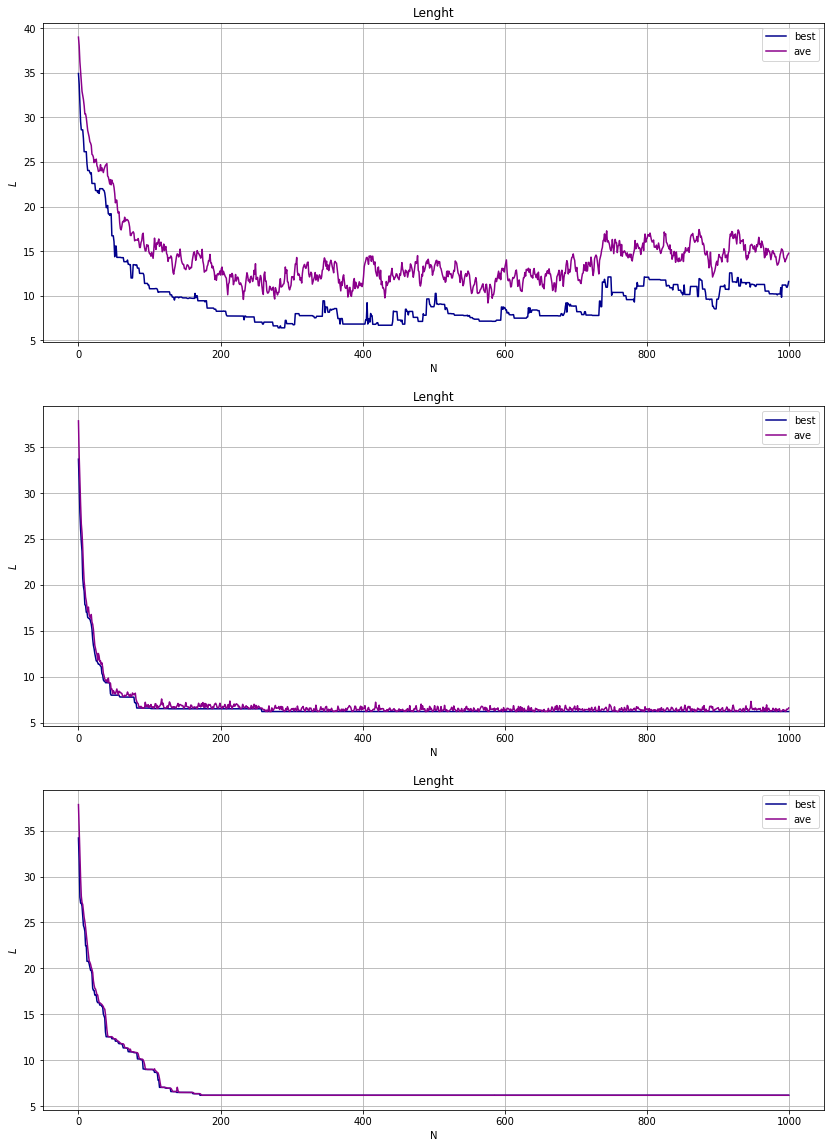

In [51]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L=np.loadtxt("BestPathCP9.0")
L_ave=np.loadtxt("IterationAveCP9.0")
L1=np.loadtxt("BestPathC9.0")
L1_ave=np.loadtxt("IterationAveC9.0")
L2=np.loadtxt("BestPathC3.0")
L2_ave=np.loadtxt("IterationAveC3.0")
L3=np.loadtxt("BestPathC6.0")
L3_ave=np.loadtxt("IterationAveC6.0")

fig=plt.figure(figsize=(14,20))


plt.subplot(311)
plt.plot(x, L, color="darkblue", label="best")
plt.plot(x, L_ave, color="darkmagenta", label="ave")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Lenght")
plt.grid(True)
plt.legend()

plt.subplot(312)
plt.plot(x, L1, color="darkblue", label="best")
plt.plot(x, L1_ave, color="darkmagenta", label="ave")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Lenght")
plt.grid(True)
plt.legend()

plt.subplot(313)
plt.plot(x, L2, color="darkblue", label="best")
plt.plot(x, L2_ave, color="darkmagenta", label="ave")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Lenght")
plt.grid(True)
plt.legend()
plt.show()

## Real simulation results

best lenght  6.21697


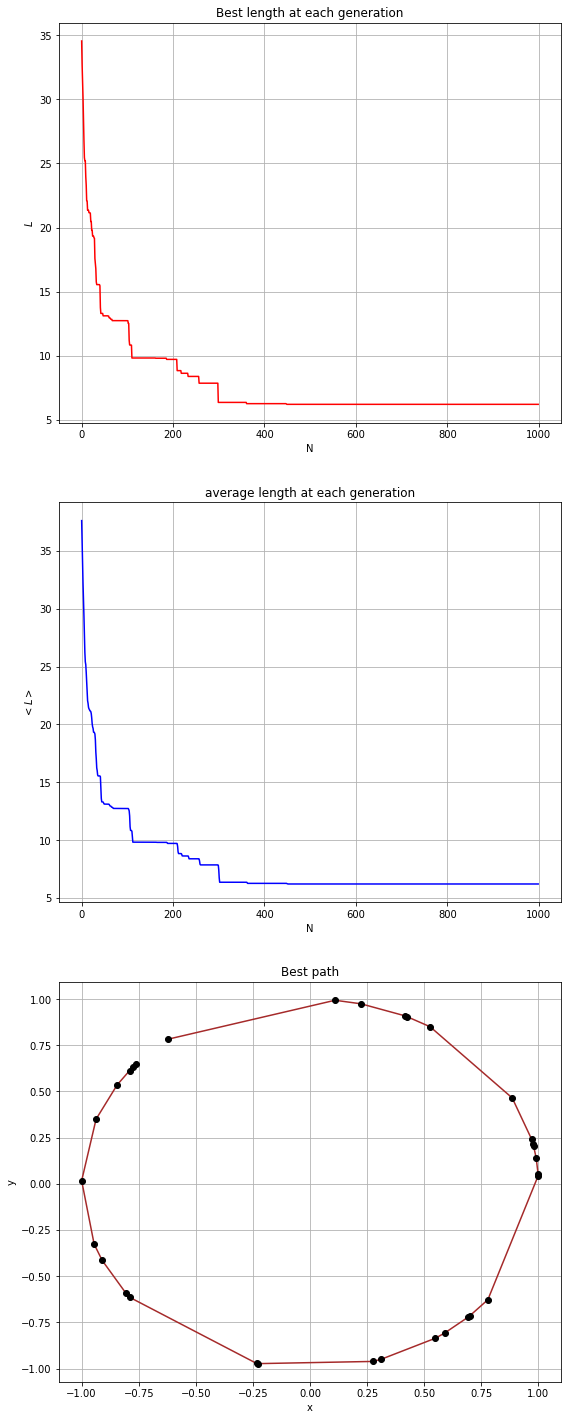

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L=np.loadtxt("BestPathC.0")
L_ave=np.loadtxt("IterationAveC.0")
x_best, y_best=np.loadtxt("pathC.0", usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(9,25))
plt.subplot(311)
plt.plot(x, L, color="red")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

plt.subplot(312)
plt.plot(x, L_ave, color="blue")
plt.xlabel('N')
plt.ylabel('$<L>$')
plt.title("average length at each generation")
plt.grid(True)

plt.subplot(313)
plt.plot(x_best, y_best, color="brown")
plt.plot(x_best, y_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
plt.grid(True)

print("best lenght ",L[999])

plt.show()

best lenght  10.1152


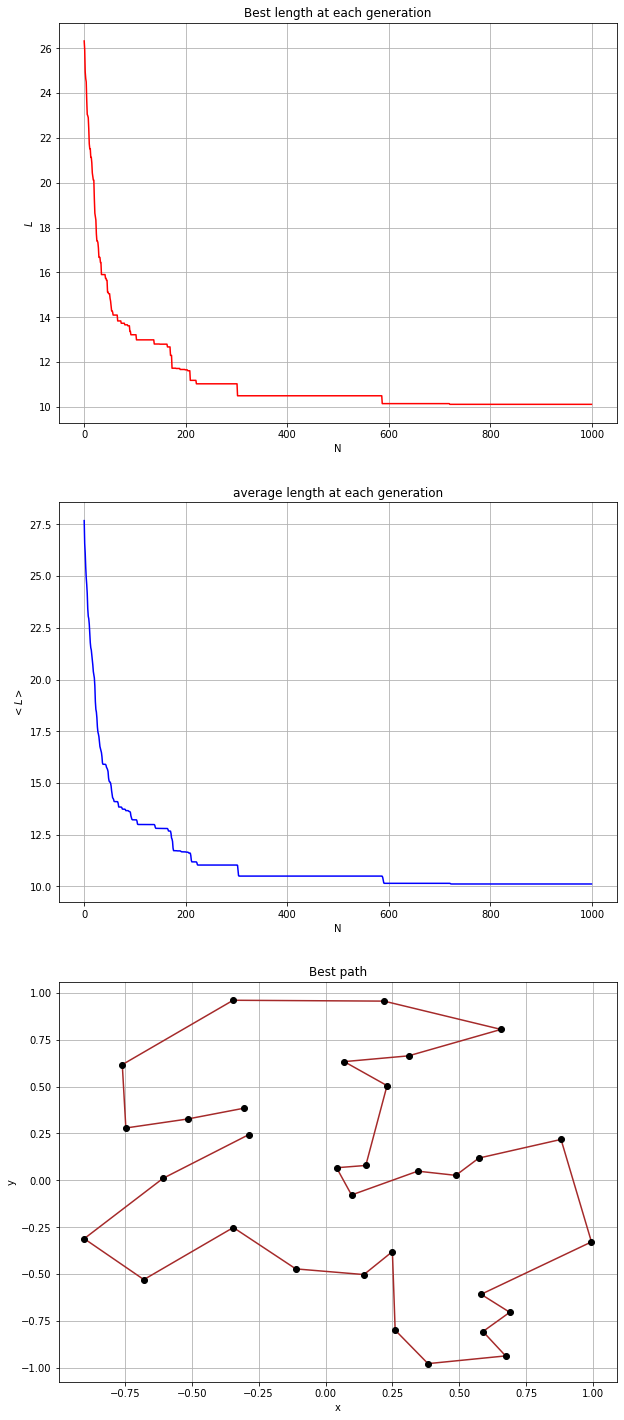

In [2]:
## import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x = np.arange(1000)

L=np.loadtxt("BestPathS.0")
L_ave=np.loadtxt("IterationAveS.0")
x_best, y_best=np.loadtxt("pathS.0",usecols=(1,2), unpack=True)

fig=plt.figure(figsize=(10,25))
plt.subplot(311)
plt.plot(x, L, color="red")
plt.xlabel('N')
plt.ylabel('$L$')
plt.title("Best length at each generation")
plt.grid(True)

plt.subplot(312)
plt.plot(x, L_ave, color="blue")
plt.xlabel('N')
plt.ylabel('$<L>$')
plt.title("average length at each generation")
plt.grid(True)

plt.subplot(313)
plt.plot(x_best, y_best, color="brown")
plt.plot(x_best, y_best, 'bo',color="black")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Best path")
plt.grid(True)

print("best lenght ",L[999])

plt.show()